In [5]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('PSEI.PS.csv', parse_dates=['Date'], usecols=['Date', 'Close'])

In [11]:
df.head()

,Date,Close
0,1987-01-02,439.529999
1,1987-01-05,455.230011
2,1987-01-06,462.260010
3,1987-01-07,462.500000
4,1987-01-08,483.019989


In [62]:
def per_diff(base, x):
    return ((x-base)/base)*100

In [212]:
prices1997 = df[(df['Date']>'1997-02-02') & (df['Date']<'1998-01-09')]
changes_1997 = prices1997['Close'].apply(lambda x: per_diff(prices1997['Close'].iloc[0], x))

prices2008 = df[(df['Date']>'2008-01-01') & (df['Date']<'2008-10-28')]
changes_2008 = prices2008['Close'].apply(lambda x: per_diff(prices2008['Close'].iloc[0], x))

prices2013 = df[(df['Date']>'2013-05-14') & (df['Date']<'2013-08-28')]
changes_2013 = prices2013['Close'].apply(lambda x: per_diff(prices2013['Close'].iloc[0], x))

prices2015 = df[(df['Date']>'2015-04-09') & (df['Date']<'2016-01-21')]
changes_2015 = prices2015['Close'].apply(lambda x: per_diff(prices2015['Close'].iloc[0], x))

prices2018 = df[(df['Date']>'2018-01-28') & (df['Date']<'2018-11-13')]
changes_2018 = prices2018['Close'].apply(lambda x: per_diff(prices2018['Close'].iloc[0], x))

covid = df[(df['Date']>'2020-01-06')]
changes_covid = covid['Close'].apply(lambda x: per_diff(covid['Close'].iloc[0], x))

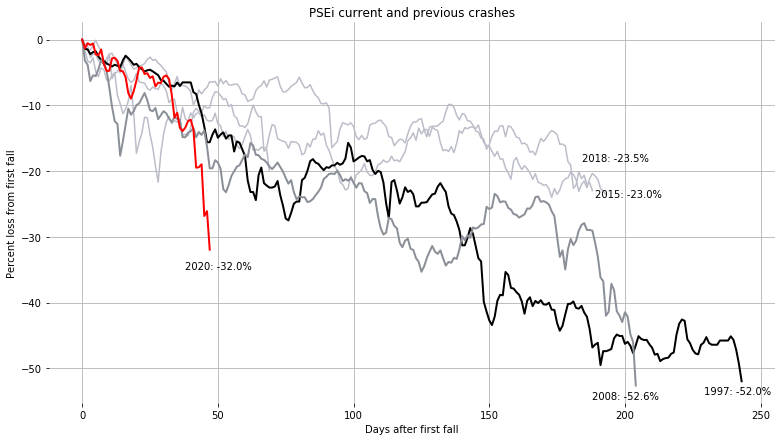

In [220]:
plt.figure(figsize=(13,7))
plt.xlabel('Days after first fall')
plt.ylabel('Percent loss from first fall')
plt.title('PSEi current and previous crashes')
plt.box(False)
plt.grid(True)
plt.plot(list(changes_2013), c='#BBBDC8')
plt.plot(list(changes_2015), c='#BBBDC8')
plt.annotate(s='2015: {}%'.format(round(list(changes_2015)[-1], 1)), xy=(len(changes_2015), list(changes_2015)[-1]-1))
plt.plot(list(changes_2018), c='#BBBDC8')
plt.annotate(s='2018: {}%'.format(round(list(changes_2018)[-1], 1)), xy=(len(changes_2018)-10, list(changes_2018)[-1]+5))
plt.plot(list(changes_1997), c='black', linewidth=2)
plt.annotate(s='1997: {}%'.format(round(list(changes_1997)[-1], 1)), xy=(len(changes_1997)-15, list(changes_1997)[-1]-2))
plt.plot(list(changes_2008), c='#8B9098', linewidth=2)
plt.annotate(s='2008: {}%'.format(round(list(changes_2008)[-1], 1)), xy=(len(changes_2008)-17, list(changes_2008)[-1]-2))
plt.plot(list(changes_covid), c='red', linewidth=2)
plt.annotate(s='2020: {}%'.format(round(list(changes_covid)[-1], 1)), xy=(len(changes_covid)-10, list(changes_covid)[-1]-3))
plt.savefig('PSEi_crash.png')